# Pipeline

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

%matplotlib inline
%matplotlib widget

## 1D Cases

In [30]:
hole = np.array([-1, 1])
obj = np.array([-0.3, 1.3])
# initial_guess_left = scipy.stats.norm(hole[0], 0.5)
initial_guess_left = scipy.stats.norm(obj[0], 0.1)
# initial_guess_right = scipy.stats.norm(hole[1], 0.5)
initial_guess_right = scipy.stats.norm(obj[1], 0.1)
mean = np.array([initial_guess_left.mean(), initial_guess_right.mean()])
disp = mean.mean()
mean -= disp
obj -= disp
std = np.array([initial_guess_left.std(), initial_guess_right.std()])
guess = [scipy.stats.norm(mean[i], std[i]) for i in range(2)]

/tmp/user/22013/ipykernel_2443693/656089876.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5))


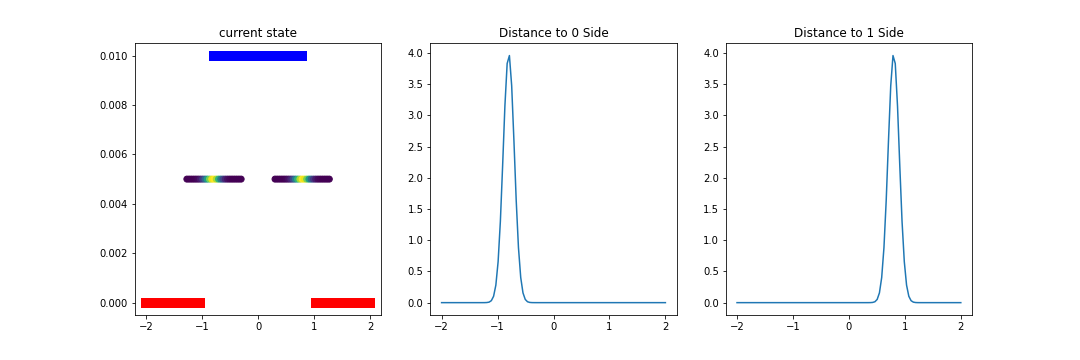

In [31]:
fig = plt.figure(figsize=(15,5))

# Plot scene
x_grid = np.linspace(-2, 2, 100)

ax = fig.add_subplot(1, 3, 1)
mask = x_grid>hole[1] 
ax.plot(x_grid[mask], np.zeros(mask.sum()), 'r', linewidth=10)
mask = x_grid<hole[0] 
ax.plot(x_grid[mask], np.zeros((mask).sum()), 'r', linewidth=10)
mask = (x_grid>obj[0]) & (x_grid<obj[1])
ax.plot(x_grid[mask], np.ones((mask).sum())*0.01, 'b', linewidth=10)

# plot initial guess
for i in range(2):
  mask = (x_grid<(mean[i]+0.5)) & (x_grid > mean[i]-0.5)
  color = guess[i].pdf(x_grid[mask])
  ax.scatter(x_grid[mask], np.ones(mask.sum())*0.005, c=color, cmap='viridis', linewidths=1)

ax.title.set_text('current state')


# Plot Two side distribution
for i in range(2):
  ax = fig.add_subplot(1, 3, i+2)
  ax.plot(x_grid, guess[i].pdf(x_grid))
  ax.title.set_text(f'Distance to {i} Side')


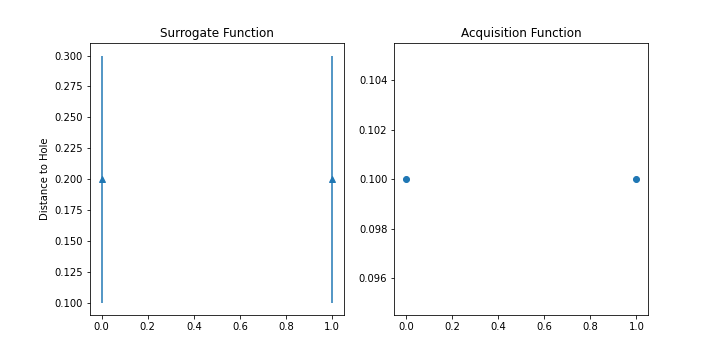

In [32]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
ax.errorbar([0,1], [mean[0]-hole[0], hole[1]-mean[1]], std, linestyle='None', marker='^')
ax.title.set_text('Surrogate Function')
ax.set_ylabel('Distance to Hole')

ax = fig.add_subplot(1, 2, 2)
ax.scatter([0,1], [initial_guess_left.std(), initial_guess_right.std()])
ax.title.set_text('Acquisition Function')